**1.1**

In [1]:
import numpy as np
import random
import math
from numpy import array, exp
!pip install keras
!pip install tensorflow 
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore', under = 'ignore')
class Layer:
  def ForwardPropagation(self, input):
    pass
  def BackwardPropagation(self, error):
    pass

**1.2**

In [2]:
class LinearLayer(Layer):

  def ForwardPropagation(self, input):
    self.input = input
    dot_p = np.dot(input, self.weights)
    self.output = self.bias + dot_p
    return self.output

  def BackwardPropagation(self, l_err, l_r):
    self.weights -= l_r * np.dot(self.input.T, l_err)
    self.bias = self.bias -  l_r * l_err
    return np.dot(l_err, self.weights.T)

  def __init__(self, inpu, outp):
    self.weights = np.array([[random.random() - 0.5 for i in range(outp)] for j in range(inpu)])
    self.bias = np.array([random.random() - 0.5 for i in range(outp)])

  def get_weights(self):
    return self.weights

**1.3**

In [3]:
class Sigmoid(Layer):
  def forward(self, x):
    e = exp(-array(x))
    e = 1 / (1 + e)
    return np.array(e)

  def back(self, x):
    f = np.array(self.forward(x))
    s = np.array(1 - self.forward(x))
    return f * s

  def ForwardPropagation(self, input):
    self.input = input
    return self.forward(input)

  def BackwardPropagation(self, l_err, l_r):
    return self.back(self.input) * l_err

  def get_weights(self):
    return []

**1.4**

In [4]:
class Tanh(Layer):

  def forward(self, x):
    return np.tanh(x)

  def backward(self, x):
    return 1 - np.tanh(x)**2

  def ForwardPropagation(self, input):
    self.input = input
    return self.forward(input)

  def BackwardPropagation(self, l_err, l_r):
    b = self.backward(self.input)
    return b * l_err

  def get_weights(self):
    return []

**1.5**

In [5]:
class Softmax(Layer):

  def forward(self, x):
    if isinstance(x, float):
      return 1
    else:
      su = sum([math.exp(x[i]) for i in range(len(x))])
      result = [math.exp(x[i])/su for i in range(len(x))]
      return result

  def ForwardPropagation(self, input):
    self.input = input
    return self.forward(input)

  def BackwardPropagation(self, l_err, learning_rate):
    su = sum([l_err[i] * self.forward(self.input[i]) for i in range(len(l_err))])
    r = self.forward(self.input)
    result = [-r[i] * (su - l_err[i]) for i in range(len(l_err))]
    return result

  def get_weights(self):
    return []

**1.6**

In [6]:
class Cross_Entropy(Layer):

  def ForwardPropagation(self, pred, exist):
    return -exist * np.log(abs(pred))

  def BackwardPropagation(self, a, b):
    return a - b

**1.7 and 1.8**

In [7]:
class Sequential(Layer):

  def __init__(self):
    self.sequential_layers = []
    self.entropy = Cross_Entropy()
    self.wei = []

  def add(self, layers):
    for i in layers:
      self.sequential_layers.append(i)

  def fit(self, input, output, repeat, l_r):
    rt = []
    count = 0
    while count < repeat:
      count += 1
      f_loss = 0
      inpuy = 0
      while inpuy < len(input):
        temp = input[inpuy]
        for layu in self.sequential_layers:
          temp = layu.ForwardPropagation(temp)
        f_loss += self.entropy.ForwardPropagation(temp, output[inpuy])
        error_layer = self.entropy.BackwardPropagation(temp,output[inpuy])
        for lat in reversed(self.sequential_layers):
          error_layer = lat.BackwardPropagation(error_layer, l_r)
        inpuy += 1
      rt.append(np.mean(f_loss))
      if len(rt) >= 5:
        if rt[-1] > rt[-2] > rt[-3] > rt[-4] > rt[-5]:
          return rt
    for i in reversed(self.sequential_layers):
      self.wei.append(i.get_weights())
    return rt

  def valuation(self, input, output, repeat, l_r):
    rt = []
    count = 0
    while count < repeat:
      count += 1
      f_loss = 0
      inpuy = 0
      while inpuy < len(input):
        temp = input[inpuy]
        for layu in self.sequential_layers:
          temp = layu.ForwardPropagation(temp)
        f_loss += self.entropy.ForwardPropagation(temp, output[inpuy])
        error_layer = self.entropy.BackwardPropagation(temp,output[inpuy])
        for lat in reversed(self.sequential_layers):
          error_layer = lat.BackwardPropagation(error_layer, l_r)
        inpuy += 1
      rt.append(np.mean(f_loss))
    return rt

  def predict(self, input):
    result = []
    count = 0
    while count < len(input):
      inter = input[count]
      for j in self.sequential_layers:
        inter = j.ForwardPropagation(inter)
      result.append(inter)
      count += 1
    return result

  def save(self):
    with open('result.txt', 'w') as fi:
      for i in self.wei:
          fi.write(str(i))

  def load(self):
    with open('result.txt', 'r') as fi:
      loap = []
      g = fi.readlines()
      for i in g:
        loap.append(i)
      self.wei = loap

**2**

In [8]:
input = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
output = np.array([[[0]], [[1]], [[1]], [[0]]])
xor_tan = Sequential()
xor_tan.add([LinearLayer(2,2), Sigmoid(), LinearLayer(2, 2), Sigmoid(), LinearLayer(2, 1)])
w = xor_tan.fit(input, output, 100000, 0.1)
XOR_Weights = xor_tan.save()
print(xor_tan.predict(input))

[array([[0.49994821]]), array([[0.49226354]]), array([[0.49304732]]), array([[0.48552989]])]


In [9]:
input = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
output = np.array([[[0]], [[1]], [[1]], [[0]]])
xor_sig = Sequential()
xor_sig.add([LinearLayer(2,2), Tanh(), LinearLayer(2, 2), Tanh(), LinearLayer(2, 1)])
w = xor_sig.fit(input, output, 100000, 0.1)
print(xor_sig.predict(input))

[array([[0.50272331]]), array([[0.49521801]]), array([[0.49505786]]), array([[0.48818326]])]


**3.1**

10.09


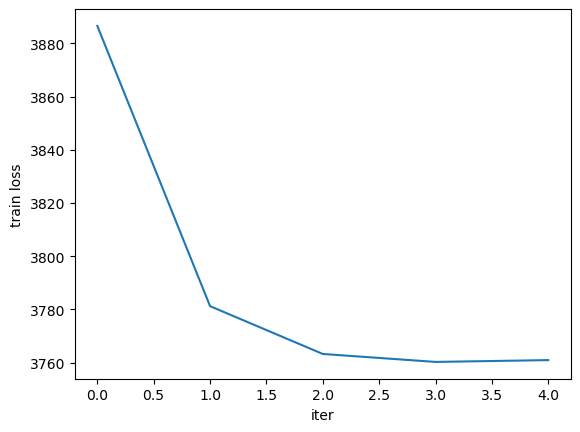

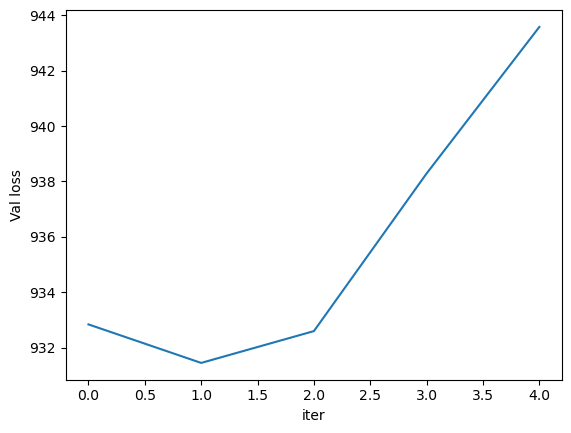

In [10]:
(i_train, o_train), (i_test, o_test) = mnist.load_data()
i_train = (i_train.reshape(i_train.shape[0], 1, 784).astype('float32'))
i_train = i_train/ 255
o_train = to_categorical(o_train)
i_test = (i_test.reshape(i_test.shape[0], 1, 784).astype('float32'))
i_test = i_test/ 255
o_test = to_categorical(o_test)
f_train = []
f_test = []
g_train = []
g_test = []
iterati = 5
count = 0
while count < 60000:
  ran = random.random()
  if ran < 0.2:
    g_train.append(i_train[count])
    g_test.append(o_train[count])
  else:
    f_train.append(i_train[count])
    f_test.append(o_train[count])
  count += 1
model = Sequential()
model.add([LinearLayer(784,256),Tanh(), LinearLayer(256,128), Sigmoid(), LinearLayer(128,64), Sigmoid(), LinearLayer(64,32), Sigmoid(),LinearLayer(32,16), Sigmoid(), LinearLayer(16,10), Tanh()])
loss = model.fit(f_train, f_test, iterati, 0.15)
loss1 = model.valuation(g_train, g_test, iterati, 0.15)
ans = model.predict(i_test)
count = 0
count1 = 0
while count < 10000:
  m = max(list(ans[count][0]))
  ink = list(ans[count][0]).index(m)
  lot = list(o_test[count]).index(1)
  if ink == lot: count1 += 1
  count += 1
print(count1/len(ans) * 100)
y_lab = [i for i in range(iterati)]
plt.plot(y_lab, loss)
plt.xlabel('iter')
plt.ylabel('train loss')
plt.show()
plt.plot(y_lab, loss1)
plt.xlabel('iter')
plt.ylabel('Val loss')
plt.show()

**3.2**

9.74


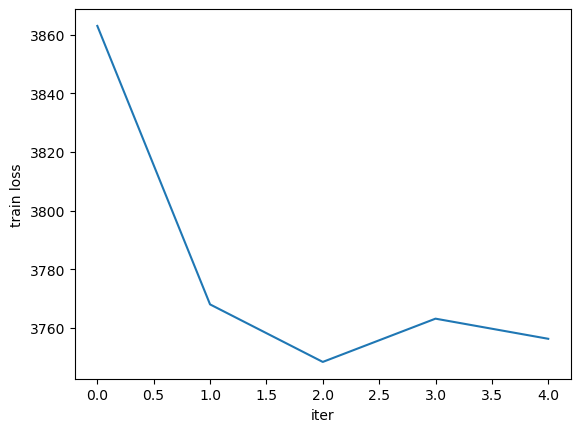

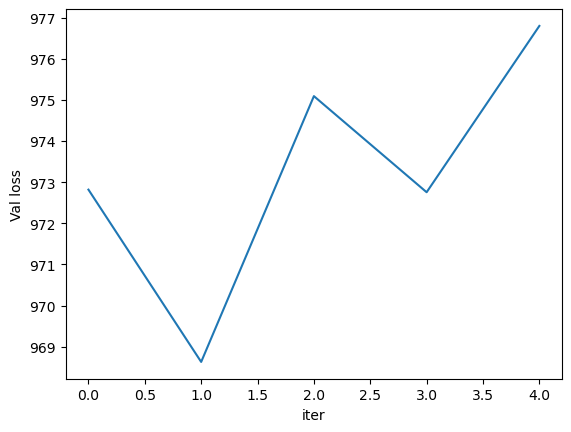

In [11]:
(i_train, o_train), (i_test, o_test) = mnist.load_data()
i_train = (i_train.reshape(i_train.shape[0], 1, 784).astype('float32'))
i_train = i_train/ 255
o_train = to_categorical(o_train)
i_test = (i_test.reshape(i_test.shape[0], 1, 784).astype('float32'))
i_test = i_test/ 255
o_test = to_categorical(o_test)
f_train = []
f_test = []
g_train = []
g_test = []
iterati = 5
count = 0
while count < 60000:
  ran = random.random()
  if ran < 0.2:
    g_train.append(i_train[count])
    g_test.append(o_train[count])
  else:
    f_train.append(i_train[count])
    f_test.append(o_train[count])
  count += 1
model = Sequential()
model.add([LinearLayer(784,256),Tanh(), LinearLayer(256,128), Sigmoid(), LinearLayer(128,64), Sigmoid(), LinearLayer(64,32), Sigmoid(),LinearLayer(32,16), Sigmoid(), LinearLayer(16,10), Tanh()])
loss = model.fit(f_train, f_test, iterati, 0.15)
loss1 = model.valuation(g_train, g_test, iterati, 0.15)
ans = model.predict(i_test)
count = 0
count1 = 0
while count < 10000:
  m = max(list(ans[count][0]))
  ink = list(ans[count][0]).index(m)
  lot = list(o_test[count]).index(1)
  if ink == lot: count1 += 1
  count += 1
print(count1/len(ans) * 100)
y_lab = [i for i in range(iterati)]
plt.plot(y_lab, loss)
plt.xlabel('iter')
plt.ylabel('train loss')
plt.show()
plt.plot(y_lab, loss1)
plt.xlabel('iter')
plt.ylabel('Val loss')
plt.show()

**3.3**

In [ ]:
(i_train, o_train), (i_test, o_test) = mnist.load_data()
i_train = (i_train.reshape(i_train.shape[0], 1, 784).astype('float32'))
i_train = i_train/ 255
o_train = to_categorical(o_train)
i_test = (i_test.reshape(i_test.shape[0], 1, 784).astype('float32'))
i_test = i_test/ 255
o_test =to_categorical(o_test)
f_train = []
f_test = []
g_train = []
g_test = []
iterati = 5
count = 0
while count < 60000:
  ran = random.random()
  if ran < 0.2:
    g_train.append(i_train[count])
    g_test.append(o_train[count])
  else:
    f_train.append(i_train[count])
    f_test.append(o_train[count])
  count += 1
model = Sequential()
model.add([LinearLayer(784,256),Sigmoid(), LinearLayer(256,128), Sigmoid(), LinearLayer(128,64), Sigmoid(), LinearLayer(64,32), Sigmoid(),LinearLayer(32,16), Sigmoid(), LinearLayer(16,10), Sigmoid()])
loss = model.fit(f_train, f_test, iterati, 0.15)
loss1 = model.valuation(g_train, g_test, iterati, 0.15)
ans = model.predict(i_test)
count = 0
count1 = 0
while count < 10000:
  m = max(list(ans[count][0]))
  ink = list(ans[count][0]).index(m)
  lot = list(o_test[count]).index(1)
  if ink == lot: count1 += 1
  count += 1
print(count1/len(ans) * 100)
y_lab = [i for i in range(iterati)]
plt.plot(y_lab, loss)
plt.xlabel('iter')
plt.ylabel('train loss')
plt.show()
plt.plot(y_lab, loss1)
plt.xlabel('iter')
plt.ylabel('Val loss')
plt.show()

Learning Rate = 1

In [ ]:
(i_train, o_train), (i_test, o_test) = mnist.load_data()
i_train = (i_train.reshape(i_train.shape[0], 1, 784).astype('float32'))
i_train = i_train/ 255
o_train = to_categorical(o_train)
i_test = (i_test.reshape(i_test.shape[0], 1, 784).astype('float32'))
i_test = i_test/ 255
o_test =to_categorical(o_test)
f_train = []
f_test = []
g_train = []
g_test = []
iterati = 5
count = 0
while count < 60000:
  ran = random.random()
  if ran < 0.2:
    g_train.append(i_train[count])
    g_test.append(o_train[count])
  else:
    f_train.append(i_train[count])
    f_test.append(o_train[count])
  count += 1
model = Sequential()
model.add([LinearLayer(784,256),Sigmoid(), LinearLayer(256,128), Sigmoid(), LinearLayer(128,64), Sigmoid(), LinearLayer(64,32), Sigmoid(),LinearLayer(32,16), Sigmoid(), LinearLayer(16,10), Sigmoid()])
loss = model.fit(f_train, f_test, iterati, 1)
loss1 = model.valuation(g_train, g_test, iterati, 1)
ans = model.predict(i_test)
count = 0
count1 = 0
while count < 10000:
  m = max(list(ans[count][0]))
  ink = list(ans[count][0]).index(m)
  lot = list(o_test[count]).index(1)
  if ink == lot: count1 += 1
  count += 1
print(count1/len(ans) * 100)
y_lab = [i for i in range(iterati)]
plt.plot(y_lab, loss)
plt.xlabel('iter')
plt.ylabel('train loss')
plt.show()
plt.plot(y_lab, loss1)
plt.xlabel('iter')
plt.ylabel('Val loss')
plt.show()

Learning Rate = 0.001

In [ ]:
(i_train, o_train), (i_test, o_test) = mnist.load_data()
i_train = (i_train.reshape(i_train.shape[0], 1, 784).astype('float32'))
i_train = i_train/ 255
o_train = to_categorical(o_train)
i_test = (i_test.reshape(i_test.shape[0], 1, 784).astype('float32'))
i_test = i_test/ 255
o_test = to_categorical(o_test)
f_train = []
f_test = []
g_train = []
g_test = []
iterati = 5
count = 0
while count < 60000:
  ran = random.random()
  if ran < 0.2:
    g_train.append(i_train[count])
    g_test.append(o_train[count])
  else:
    f_train.append(i_train[count])
    f_test.append(o_train[count])
  count += 1
model = Sequential()
model.add([LinearLayer(784,256),Sigmoid(), LinearLayer(256,128), Sigmoid(), LinearLayer(128,64), Sigmoid(), LinearLayer(64,32), Sigmoid(),LinearLayer(32,10), Sigmoid()])
loss = model.fit(f_train, f_test, iterati, 0.001)
loss1 = model.valuation(g_train, g_test, iterati, 0.001)
ans = model.predict(i_test)
count = 0
count1 = 0
while count < 10000:
  m = max(list(ans[count][0]))
  ink = list(ans[count][0]).index(m)
  lot = list(o_test[count]).index(1)
  if ink == lot: count1 += 1
  count += 1
print(count/len(ans) * 100)
y_lab = [i for i in range(iterati)]
plt.plot(y_lab, loss)
plt.xlabel('iter')
plt.ylabel('train loss')
plt.show()
plt.plot(y_lab, loss1)
plt.xlabel('iter')
plt.ylabel('Val loss')
plt.show()

Random weights

In [ ]:
class Random_LinearLayer(Layer):

  def ForwardPropagation(self, input):
    self.input = input
    dot_p = np.dot(input, self.weights)
    self.output = self.bias + dot_p
    return self.output

  def BackwardPropagation(self, l_err, l_r):
    self.weights -= l_r * np.dot(self.input.T, l_err)
    self.bias = self.bias -  l_r * l_err
    return np.dot(l_err, self.weights.T)

  def __init__(self, inpu, outp,s,e):
    self.weights = np.array([[random.randint(s,e) - 0.5 for i in range(outp)] for j in range(inpu)])
    self.bias = np.array([random.randint(s,e) - 0.5 for i in range(outp)])

  def get_weights(self):
    return self.weights

-10 to 10

In [ ]:
(i_train, o_train), (i_test, o_test) = mnist.load_data()
i_train = (i_train.reshape(i_train.shape[0], 1, 784).astype('float32'))
i_train = i_train/ 255
o_train = to_categorical(o_train)
i_test = (i_test.reshape(i_test.shape[0], 1, 784).astype('float32'))
i_test = i_test/ 255
o_test = to_categorical(o_test)
f_train = []
f_test = []
g_train = []
g_test = []
iterati = 5
count = 0
while count < 60000:
  ran = random.random()
  if ran < 0.2:
    g_train.append(i_train[count])
    g_test.append(o_train[count])
  else:
    f_train.append(i_train[count])
    f_test.append(o_train[count])
  count += 1
model = Sequential()
model.add([Random_LinearLayer(784,256,-10,10),Sigmoid(), LinearLayer(256,128), Sigmoid(), LinearLayer(128,64), Sigmoid(), LinearLayer(64,32), Sigmoid(),LinearLayer(32,16), Sigmoid(), LinearLayer(16,10), Sigmoid()])
loss = model.fit(f_train, f_test, iterati, 0.15)
loss1 = model.valuation(g_train, g_test, iterati, 0.15)
ans = model.predict(i_test)
count = 0
count1 = 0
while count < 10000:
  m = max(list(ans[count][0]))
  ink = list(ans[count][0]).index(m)
  lot = list(o_test[count]).index(1)
  if ink == lot: count1 += 1
  count += 1
print(count1/len(ans) * 100)
y_lab = [i for i in range(iterati)]
plt.plot(y_lab, loss)
plt.xlabel('iter')
plt.ylabel('train loss')
plt.show()
plt.plot(y_lab, loss1)
plt.xlabel('iter')
plt.ylabel('Val loss')
plt.show()

All zeros

In [ ]:
(i_train, o_train), (i_test, o_test) = mnist.load_data()
i_train = (i_train.reshape(i_train.shape[0], 1, 784).astype('float32'))
i_train = i_train/ 255
o_train = to_categorical(o_train)
i_test = (i_test.reshape(i_test.shape[0], 1, 784).astype('float32'))
i_test = i_test/ 255
o_test = to_categorical(o_test)
f_train = []
f_test = []
g_train = []
g_test = []
iterati = 5
count = 0
while count < 60000:
  ran = random.random()
  if ran < 0.2:
    g_train.append(i_train[count])
    g_test.append(o_train[count])
  else:
    f_train.append(i_train[count])
    f_test.append(o_train[count])
  count += 1
model = Sequential()
model.add([Random_LinearLayer(784,256,0,0),Sigmoid(), LinearLayer(256,128), Sigmoid(), LinearLayer(128,64), Sigmoid(), LinearLayer(64,32), Sigmoid(),LinearLayer(32,16), Sigmoid(), LinearLayer(16,10), Sigmoid()])
loss = model.fit(f_train, f_test, iterati, 0.15)
loss1 = model.valuation(g_train, g_test, iterati, 0.15)
ans = model.predict(i_test)
count = 0
count1 = 0
while count < 10000:
  m = max(list(ans[count][0]))
  ink = list(ans[count][0]).index(m)
  lot = list(o_test[count]).index(1)
  if ink == lot: count1 += 1
  count += 1
print(count1/len(ans) * 100)
y_lab = [i for i in range(iterati)]
plt.plot(y_lab, loss)
plt.xlabel('iter')
plt.ylabel('train loss')
plt.show()
plt.plot(y_lab, loss1)
plt.xlabel('iter')
plt.ylabel('Val loss')
plt.show()

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from neuralnetwork import Layer, Sequential, Linear, Sigmoid

# Load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Split train 95%/5% for train/valid
df_train, df_valid = train_test_split(df_train, test_size=0.05, random_state=42)

# Extract target
y_train = df_train['trip_duration'].to_numpy()
y_valid = df_valid['trip_duration'].to_numpy()

# Feature engineering
features = ['pickup_datetime', 'pickup_lat', 'pickup_lon', 'passenger_count']
X_train = df_train[features].to_numpy()
X_valid = df_valid[features].to_numpy()

# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Model selection
models = {}
for n_layers, n_nodes in [(2,32), (3,64), (4,128)]:

  # Define model
  model = Sequential()
  model.add(Linear(n_features, n_nodes))
  model.add(Sigmoid())

  # Train
  epochs = 100
  train_losses = []
  valid_losses = []

  for epoch in range(epochs):
    y_pred = model.forward(X_train)
    loss = model.compute_loss(y_pred, y_train)

    y_valid_pred = model.predict(X_valid)
    valid_loss = model.compute_loss(y_valid_pred, y_valid)

    train_losses.append(loss)
    valid_losses.append(valid_loss)

  # Plot losses
  plt.plot(train_losses)
  plt.plot(valid_losses)
  plt.title(f'{n_layers} layers, {n_nodes} nodes')
  plt.legend(['Train', 'Valid'])
  plt.xlabel('Epoch')

  # Save
  models[(n_layers, n_nodes)] = {
    'model': model,
    'train_losses': train_losses,
    'valid_losses': valid_losses
  }

# Evaluation
X_test = scaler.transform(df_test[features].to_numpy())
for k, v in models.items():
  y_pred = v['model'].predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f'{k} test accuracy: {acc}')